# Collaboration and Competition

---

In this report, I describe solving the Tennis environment with two policy gradient methods: Multi-Agent Proximal Policy Optimization ("MAPPO") and Multi-Agent Deep Deterministic Policy Graident ("MADDPG") methods.

## Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments

According to Lowe, Wu et al., 2017, naïve policy gradient methods perform poorly in simple multi-agent settings. Thus, the authors derived an algorithm called "Multi-Agent Actor Critic" which works in multi-agent settings under the following constraints:

- The learned policies can only use local information (i.e. their own observations) at execution time;
- We do not assume a differentiable model of the environment dynamics; and 
- We do not assume any particular structure on the communication method between agents (that is, we don’t assume a differentiable communication channel).

The algorithm adopts the framework of centralized training with decentralized execution. That is, information of all the agents is used to train individual critics, but new actions are derived based on each agent's state information only.

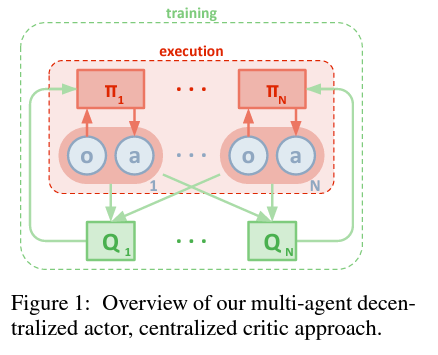

## PPO & MAPPO

PPO is a policy gradient method, and it is described in detail in this page (https://github.com/suesuyeonlim/unity_reacher/blob/main/Report.ipynb). In order to solve the Tennis environment, I implemented PPO and MAPPO algorithms. In addition, I experimented with an algorithm which has a critic that takes in the state and action information of the all agents to yield Q values for each of the agents and an actor that uses state information of each agent to yield its actions.

### Hyperparameters
| Hyperparameter | PPO | MAPPO | Alternative PPO |
| --- | --- | --- | --- |
| Optimizer | Adam | Adam | Adam |
| Learning Rate | 5e-5 | 5e-5 | 5e-5 |
| Gradient Clipping | 10 | 10 | 10 |
| Epoch | 1 to 10 | 1 to 10 | 1 to 10 |
| Batch Size | 500 | 250 | 250 |
| Discount Factor | 0.99 | 0.99 | 0.99 |
| Lambda in Generalized Advantage Estimation | 0.95 | 0.95 | 0.95 |
| Network Architecture - Actor | Tanh, 24/400/300 | Tanh, 24/400/300 | Tanh, 24/256/128 |
| Network Architecture - Critic | Tanh, 24/400/300 | Tanh, 48/400/300 | Tanh, 48/256/128 |

### Results
I was able to achieve an average score of 0.5 using PPO, MAPPO, and the altnernative PPO in 4,955, 10,301, and 6,817 episodes.

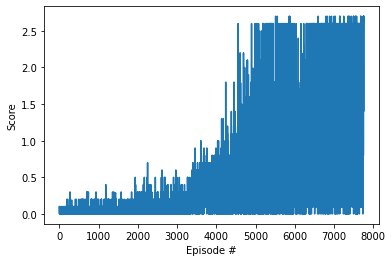
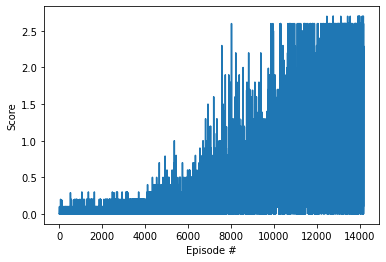
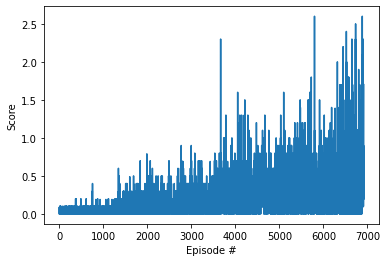

### Future Ideas
- A more systematic approach in tuning hyperparameters such as grid search or random search would be beneficial. 
- Employing different regularization techniques such as weight decay may be useful in generalizing the model better. For this project, I used Cross-Entropy method provided by Udacity.
- Trying out different distributions for actions or even using a non-parametric one may be worth it. For this project, I used the normal distribution.
- Instead of using advantage functions, it may be worth trying discounted future rewards or even the current reward.

## DDPG & MADDPG
DDPG is an algorithm which concurrently learns a Q-function and a policy. It is described in detail in this page (https://github.com/suesuyeonlim/unity_reacher/blob/main/Report.ipynb). Similarly to the previous section, I implemented DDPG, MADDPG, and an alternative algorithm of DDPG.

### Hyperparameters
| Hyperparameter | PPO | MAPPO | Alternative PPO |
| --- | --- | --- | --- |
| Optimizer | Adam | Adam | Adam |
| Learning Rate | 1e-4 | 1e-4 | 1e-4 |
| Buffer Size | 1e5 | 1e5 | 1e5 |
| Batch Size | 128 | 128 | 128 |
| Noise Type | Gaussian | Gaussian | Gaussian |
| Initial Noise Scale | 2 | 2 | 2 | 
| Noise Decay Rate | 0.9999 | 0.9999 | 0.9999 |
| Minimum Noise | 0.1 | 0.1 | 0.1 |
| Discount Factor | 0.98 | 0.98 | 0.98 |
| Tau for Soft Update | 0.003 | 0.003 | 0.003 |
| Network Architecture - Actor | ReLU, 24/400/300 | ReLU, 24/400/300 | ReLU, 24/400/300 |
| Network Architecture - Critic | ReLU, 24/400/300 | ReLU, 48/400/300 | ReLU, 48/400/300 |

### Results
I was able to achieve an average score of 0.5 using DDPG, MADDPG, and the alternative DDPG in 677, 1,737, and 918 episodes. See graphs below. 

In general, I found that the DDPG algorithms worked much better than the PPO algorithms in terms of the number of episodes required to reach an average score of 0.5 and the peak scores reached. The average scores from the DDPG could even surpass 2.0 and 2.5 using the alternative algorithm. In contrast, the peak scores from the PPO algorithms were around 1.2.

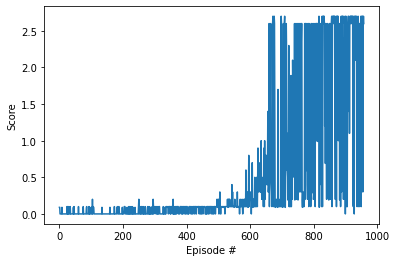
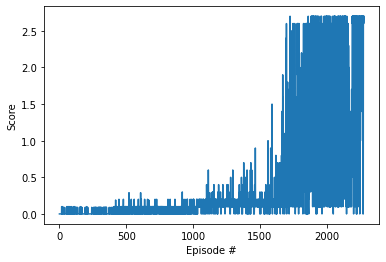
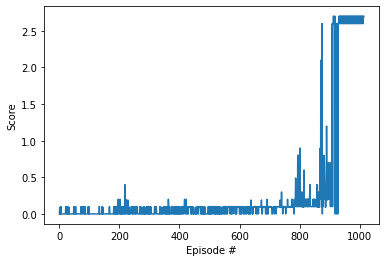

### Future Ideas
- Just like PPO, a more systematic approach in tuning hyperparameters such as grid search or random search would be beneficial.
- I noticed that the DDPG algorithms start performing worse after reaching a peak score. It would be useful to figure out why this happens and how to remedy this phenomenon.
- It may expedite the agent's learning if techniques such as experience replay, double DQN, or duelling DQN are introduced.

## Reference
- https://proceedings.neurips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf
- https://spinningup.openai.com/en/latest/